In [21]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import sys
import xlrd
import random
import pandas as pd
import csv
import os
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras_metrics as km
from keras import backend as K

In [22]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def root_mean_squared_error(y_true, y_pred): 
     return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [23]:
#圖表函數
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# **<font color = red>資料分割</font>**

In [24]:
# with open('data\\bank.txt') as bank:
#     rows = bank.readlines()
# trainSize = int(0.8*len(rows))
# testSize = len(rows)-trainSize
# trainData = random.sample(rows,trainSize)
# print(trainSize)
# with open("data\\bankTrain.csv","w") as csvTrain:
#     with open("data\\bankTest.csv","w") as csvTest:
#         writerTrain = csv.writer(csvTrain)
#         writerTest = csv.writer(csvTest)
#         writerTrain.writerow(rows[0][:-1].split(','))
#         writerTest.writerow(rows[0][:-1].split(','))
#         for i in rows[1:]:
#             if(np.isin(i,trainData)):
#                 writerTrain.writerow(i[:-1].split(','))
#             else:
#                 writerTest.writerow(i[:-1].split(','))
                


In [25]:
trainingData = pd.read_csv("D:\\機器學習\\1\\bankTrain.csv")
trainingData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [26]:
vaildingData = pd.read_csv("D:\\機器學習\\1\\bankValid.csv")
vaildingData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
1,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
2,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
3,25,blue-collar,single,primary,no,-221,yes,no,unknown,23,may,250,1,-1,0,unknown,no
4,38,management,divorced,unknown,no,0,yes,no,cellular,18,nov,96,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
900,35,blue-collar,single,secondary,no,0,yes,no,cellular,16,apr,169,1,-1,0,unknown,no
901,28,technician,single,tertiary,no,0,yes,no,unknown,4,jun,205,6,-1,0,unknown,no
902,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no


# **<font color = red>資料前置處理_1.刪除空直_2.將類別數值化_3.切割輸入輸出</font>**

In [27]:
trainingData=trainingData.dropna()
vaildingData=vaildingData.dropna()

In [28]:
labelencoder = LabelEncoder()

trainingData['job'] = labelencoder.fit_transform(trainingData['job'])
trainingData['marital'] = labelencoder.fit_transform(trainingData['marital'])
trainingData['education'] = labelencoder.fit_transform(trainingData['education'])
trainingData['default'] = labelencoder.fit_transform(trainingData['default'])
trainingData['housing'] = labelencoder.fit_transform(trainingData['housing'])
trainingData['loan'] = labelencoder.fit_transform(trainingData['loan'])
trainingData['contact'] = labelencoder.fit_transform(trainingData['contact'])
trainingData['month'] = labelencoder.fit_transform(trainingData['month'])
trainingData['poutcome'] = labelencoder.fit_transform(trainingData['poutcome'])
trainingData['y'] = labelencoder.fit_transform(trainingData['y'])

vaildingData['job'] = labelencoder.fit_transform(vaildingData['job'])
vaildingData['marital'] = labelencoder.fit_transform(vaildingData['marital'])
vaildingData['education'] = labelencoder.fit_transform(vaildingData['education'])
vaildingData['default'] = labelencoder.fit_transform(vaildingData['default'])
vaildingData['housing'] = labelencoder.fit_transform(vaildingData['housing'])
vaildingData['loan'] = labelencoder.fit_transform(vaildingData['loan'])
vaildingData['contact'] = labelencoder.fit_transform(vaildingData['contact'])
vaildingData['month'] = labelencoder.fit_transform(vaildingData['month'])
vaildingData['poutcome'] = labelencoder.fit_transform(vaildingData['poutcome'])
vaildingData['y'] = labelencoder.fit_transform(vaildingData['y'])

In [29]:
cols = ['age']
train_Label = trainingData[cols]
train_Features = trainingData.drop(cols,axis=1)
test_Label = vaildingData[cols]
test_Features = vaildingData.drop(cols,axis=1)

In [30]:
#進行資料正規化
min_max_scaler = preprocessing.MaxAbsScaler()
train_Features = min_max_scaler.fit_transform(train_Features)
test_Features = min_max_scaler.fit_transform(test_Features)
print(train_Features)
print(test_Features)
print(train_Label)
print(test_Label)

[[0.90909091 0.5        0.         ... 0.         1.         0.        ]
 [0.63636364 0.5        0.33333333 ... 0.16       0.         0.        ]
 [0.36363636 1.         0.66666667 ... 0.04       0.         0.        ]
 ...
 [0.81818182 0.5        0.33333333 ... 0.         1.         0.        ]
 [0.09090909 0.5        0.33333333 ... 0.12       0.33333333 0.        ]
 [0.18181818 1.         0.66666667 ... 0.28       0.33333333 0.        ]]
[[0.36363636 1.         0.66666667 ... 0.04347826 0.         0.        ]
 [0.09090909 0.5        0.33333333 ... 0.         1.         0.        ]
 [0.81818182 0.5        0.33333333 ... 0.         1.         0.        ]
 ...
 [0.81818182 1.         0.66666667 ... 0.         1.         0.        ]
 [0.63636364 0.5        0.33333333 ... 0.         1.         0.        ]
 [0.81818182 0.5        0.33333333 ... 0.         1.         0.        ]]
      age
0      30
1      33
2      35
3      30
4      59
...   ...
4516   33
4517   57
4518   57
4519   28
45

# **<font color = red>建構model</font>**

In [31]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(train_Features.shape[1],)))
model.add(Dropout(0.2))
# model.add(layers.Dense(8, activation='relu', input_shape=(train_Features.shape[1],)))
# model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','mape',root_mean_squared_error])

In [32]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
#開始訓練
train_history = model.fit(x=train_Features,
                          y=train_Label,
                          validation_split=0.2,
                          epochs=30,
                          batch_size=64,
                          verbose=0)

In [34]:
mse1,mse2,mae,mape,rmse=model.evaluate(test_Features, test_Label, verbose=0)
print(mse1,mse2,mae,mape,rmse)

169.23707580566406 169.23707580566406 10.383468627929688 26.114036560058594 10.383468627929688


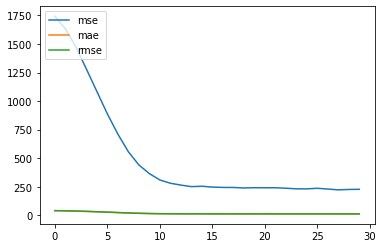

In [35]:

plt.plot(train_history.history['mse'])
plt.plot(train_history.history['mae'])
plt.plot(train_history.history['root_mean_squared_error'])
plt.legend(['mse', 'mae','rmse'], loc='upper left')
plt.show()

In [36]:
#顯示正確率及錯誤率
scores = model.evaluate(x=test_Features,
                        y=test_Label)
print("Keras evaluation result:", scores[0])
print("Percentage right: {}%.".format(scores[1]*100))
print("Error: {}%.\n".format((1-scores[1])*100))

29/29 [==============================] - 0s 1ms/step - loss: 169.2371 - mse: 169.2371 - mae: 10.3835 - mape: 26.1140 - root_mean_squared_error: 10.3835
Keras evaluation result: 169.23707580566406
Percentage right: 16923.707580566406%.
Error: -16823.707580566406%.

